# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [3]:
# loading data tz_gaming.parquet
tz_gaming = pd.read_parquet("data/tz_gaming.parquet")

In [4]:
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833


## Part I: Logistic regression 

Estimate a logistic regression model using `click` as the response variable (target) and the following as explanatory variables (features). The model should predict the probability that `click` is equal to "yes"

`time_fct, app, mobile_os, impua, clua, ctrua`

In [5]:
tz_gaming_train = tz_gaming[tz_gaming["training"] == 'train']
tz_gaming_train

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87530,train,I299985,no,11,11,app2,android,1181,0,0.000000,...,0.840336,55,0,0.000000,9625,14,0.145455,-0.249031,0.003961,id565693
87531,train,I299986,no,10,10,app33,ios,1885,0,0.000000,...,0.000000,374,0,0.000000,658,1,0.151976,0.770718,0.003961,id222657
87532,train,I299990,no,1,1,app45,ios,8,0,0.000000,...,0.000000,15,0,0.000000,166,7,4.216867,0.181559,0.018965,id340594
87533,train,I299991,no,8,8,app1,ios,113,2,1.769912,...,0.000000,0,0,0.000000,14245,158,1.109161,-1.263831,0.003961,id634151


In [6]:
clf = rsm.model.logistic(
    data = {"tz_gaming_train":tz_gaming_train},
    rvar = "click",
    lev = "yes",
    evar = [
        "time_fct",
        "app",
        "mobile_os",
        "impua",
        "clua",
        "ctrua",
    ],
)
clf.summary()

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
ti

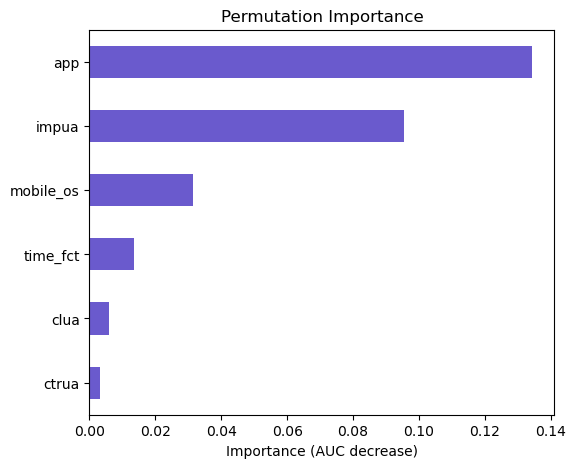

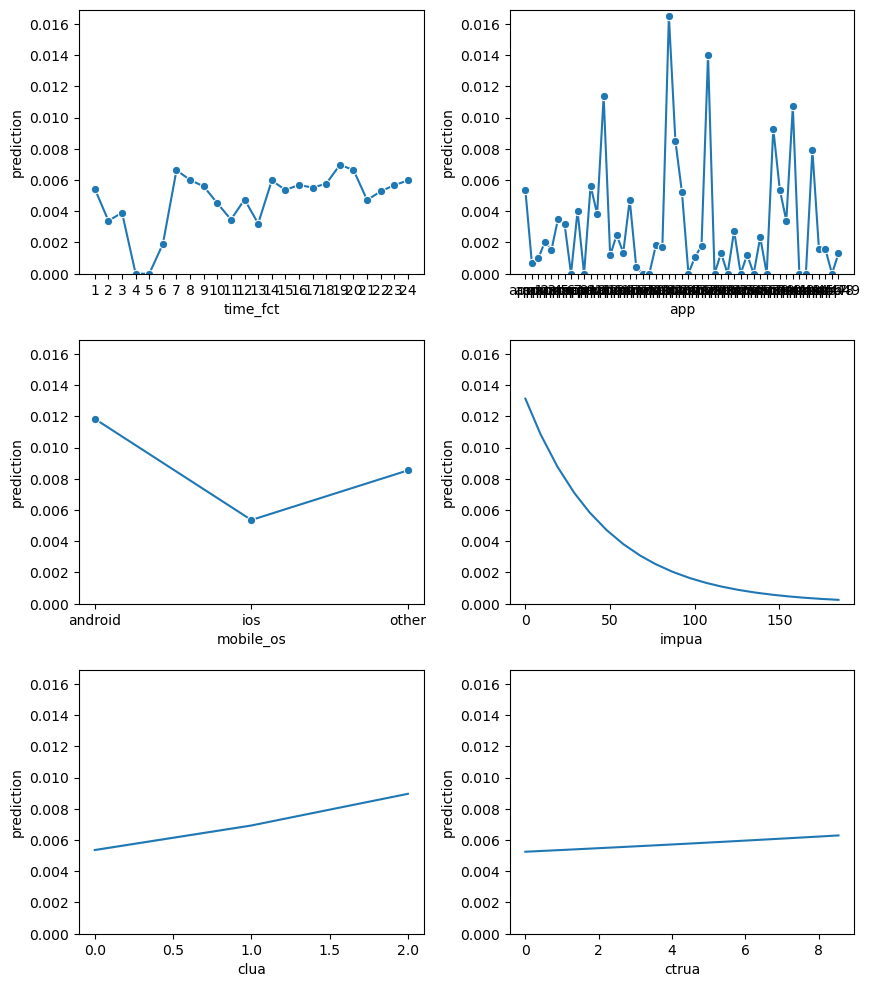

In [7]:
clf.plot("vimp")
clf.plot("pred")

#discussion in markdown cell below Permutation Importance Plot

Based on the permutation importance plot, the decrease in AUC when shuffling the variables is greatest for "app", followed by "impua", "mobile_os", "time_fct", "clua", and "ctrua". The prediction plots show increasing click probabilities for increasing "clua" and "ctra" and a sharp decrease with "impua" folllowing a pattern of accelterated decrease with a flatter decrease post 180 "impua". There is no obvious trend for "time_fct", but click probabilities seem to be lower during traditional sleep hours and lunch time. The "app" plot shows significant variability in predicted click probabilities across different apps, with some apps having vey high click probabilities and others having very low click probabilities. The "mobile_os" plot shows that android users have a higher predicted click probability and ios users have a lower predicted click probability. Details on the variable evaluation are as follows:

"app" seems to be the most important predictor in the model as per the permutation importance plot, inline with the output from the logistic regression where various levels of "app" had large effect sizes and were statistically significant. eg: app13 has an OR od 2.131, increasing click odds by 113.1% at a pvalue < 0.001, app23 with an OR of 3.111 and pvalue of 0.004 , and apps 2, 4, 6, 14, 18, 27, 31, 33 with a negative OR% (odds of a clickthrough in these apps are lesser than the baseline) and p value <0.05. In addition to the regression outcome, the prediction plots also that a few specific app categories stand out as having substantially higher predicted click probabilities, potentially due to the nature of the apps or the customer base present. 

"impua" i.e. Number of past impressions of the TZ ad the user has seen in the app. is the second most important predictor as per the permutation importance plot. The prediction plot shoes that as "impua" increases, the click prediction decreases steeply, suggesting that users with fewer past impressions have a higher likelihood of clicking, while those exposed to many impressions show a reduced click probability. the regression outcome also shows that "impua" has a negative OR of 0.979, indicating that for every additional impression, the odds of a click decrease by 2.1%. This is statistically significant with a p value < 0.001.

"mobile_os" is third on the permutation plot and the prediction plots show that android users have a higher predicted click probability than ios and other users. The regression model outputs also show that the odds of iOS users clicking are 55.0%  the odd of other  than the baseline (android) and this is statistically significant with a p value <0.001. 

"clau" i.e Number of past impressions of the TZ ad that the user has clicked on across all apps doesn't seem to have much importance as per the permutation plot but the prediction plot shows that as "clua" increases, the click prediction increases. The regression model outputs show that the odds of a click increase by 29.5% for every impression of the TZ ad that the user has clicked across all apps and this is statistically significant with a p value <0.001.

"ctrua" i.e. Past click through rate (x 100) of the TZ ad by the user across all apps doesn't seem to have much importance as per the permutation plot and the prediction plot shows that as "ctrua" increases, the click prediction increases very slightly. The regression model outputs also show that the odds of a click increases by 2.2% for every 100 past clicks on the TZ ad, and this is statistically significant with a p value <0.001.

Overall, The Chi-square test statistic is large (968.279, p < 0.001) and the p-value confirms that the model as a whole is statistically significant. The Pseudo R-squared (McFadden) of 0.109 indicates that 10.9% of the variability in the data is explained by the model. While not large, it is typical for logistic regression. The AUC value od 0.792 shows good discriminative ability, with the model performing better than random guessing (AUC = 0.5). The most important explanatory variables are "app" (specifically whether it is 13, 23 (positive impact) and 2,14,18(negative impact)), "impua", "mobile_os", and "clua" based on the permutation importance plot, prediction plots, and statistical significance in the regression output.



Predict the probability of a click 



In [8]:
tz_gaming["pred_logit"] = clf.predict(tz_gaming)["prediction"]
tz_gaming

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,158,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,74,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,19,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,37,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02


Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities

In [9]:
clf_rnd = rsm.model.logistic(
    data = {"tz_gaming_train":tz_gaming_train},
    rvar = "click",
    lev = "yes",
    evar = [
        "rnd",
    ],
)
clf_rnd.summary()


Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: rnd
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.009  -99.1%        -4.72      0.036 -130.657  < .001  ***
rnd        0.965   -3.5%        -0.04      0.036   -0.986   0.324     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): -0.0
Area under the RO Curve (AUC): 0.513
Log-likelihood: -4429.726, AIC: 8863.451, BIC: 8882.211
Chi-squared: 0.972, df(1), p.value 0.324 
Nr obs: 87,535


In [10]:
tz_gaming["pred_rnd"] = clf_rnd.predict(tz_gaming)["prediction"]


In [11]:
tz_gaming

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896


## Part II: Understanding Multicollinearity and Omitted Variable Bias

Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)



In [12]:
clf_mc1 = rsm.model.logistic(
    data = {"tz_gaming_train":tz_gaming_train},
    rvar = "click",
    lev = "yes",
    evar = [
        "imppat", #no past imp that showed tz ad in the app in the hour
        "clpat", #no past clicks the TZ ad has received in the app in the hour
        "ctrpat", #Past CTR (x 100) of the TZ ad in the app in the hour
    ],
)
clf_mc1.summary(vif = True)

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

           vif    Rsq
clpat   26.242  0.962
imppat  23.467  0.

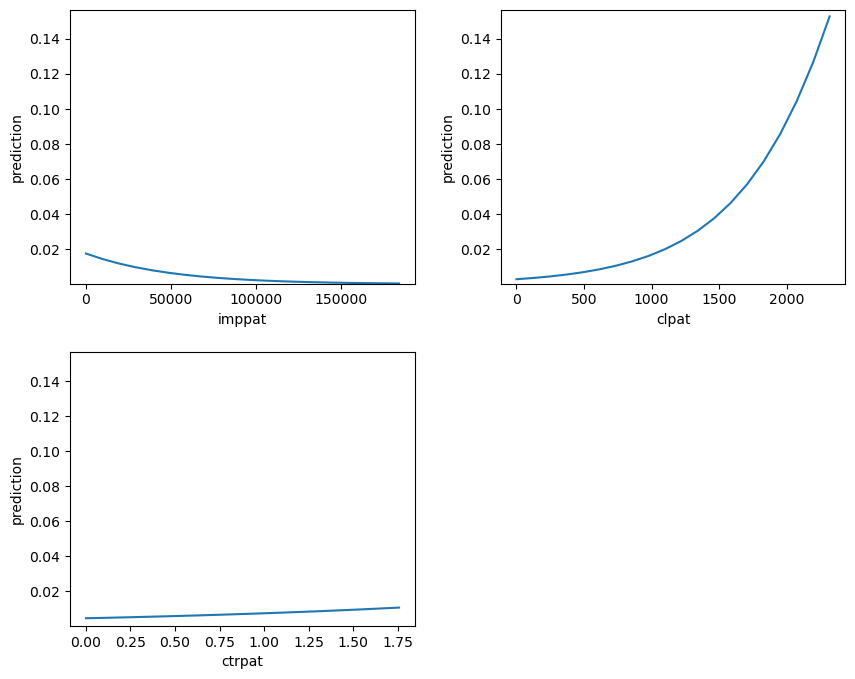

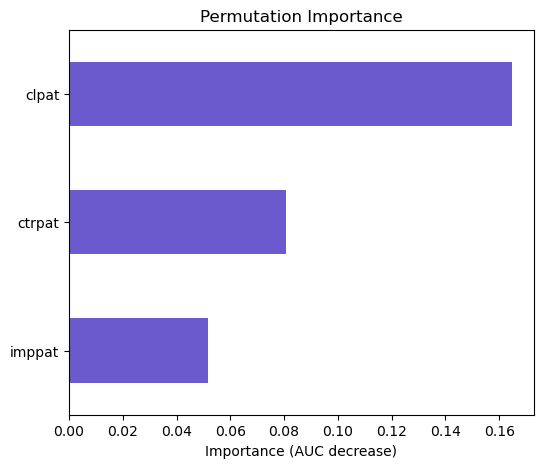

In [13]:
clf_mc1.plot("pred")
clf_mc1.plot("vimp")

According to the permutation importance plots, "clpat" (number of past clicks the TZ ad has received in the app in the hour) is the most important predictor, with the largest AUC decrease when shuffled.
"ctrpat" (past CTR of the TZ ad in the app in the hour) is the second most important variable and "imppat" (number of past impressions of the TZ ad in the app in the hour) is the least important predictor, but still contributes to the model.

The prediction plots, align with the permutation plots, and show that click probability increases sharply as "clpat" increases, almost exponentially. The "ctrpat" plot shows a mild increase in click probability as "ctrpat" increases. The "imppat" plot shows a monotonically decreasing trend, with predicted click probabilities reducing and approaching zero (almost plateauing) as the number of past impressions increases past 150,000. It is also to be noted that Permutation importance measures the total contribution of clpat, including its interactions with other variables. This means clpat could still be important through interactions rather than through a direct effect, so there might be a possible interaction effect between clpat and other variables that is not captured in the model.


The OR for "clpat" is 1.002 (p < 0.001), meaning each additional past click increases the odds of a click by 0.2%, and the p-value of <0.001 indicates that this is a statistically significant variable. While this effect seems small, it must be noted from the prediction plots that this increase is sharper with higher click counts, especially above 1500. For "ctrpat" the OR noted is 1.615, i.e. a 61.5% increase in the odds of a click for every 100 CTRs observed, at a p-value < 0.001, making this statistically significant. The OR for "imppat" is 1.000 (pvalue <0.001, marking it statistically significant effect), indicating that each additional past impression decreases the odds of a click by a negligible percentage, perhaps due to the plateauing effect seen in the prediction plot.

As for the overall model,the chi squared test statistic (314.248, p < 0.001) is relatively large and confirms that the overall model is statistically significant. The pseudo R-squared is 0.035, which indicates that the model explains 3.5% of the variability in clicks. While this R^2 value is expected for logistic regression models, it may suggest that there are omitted variables, like user/app/ad specific context, that are not included in the model which could explain the remaining variability. The AUC value of 0.676 reflects moderate predictive performance, perhaps due to missing variables, but is above the 0.5 value which denotes random guessing. There might also be interactive effects that skew the output of the model such as additive combinations or overlaps of past clicks and impressions, or the definition of ctr being clicks/impressions.

Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a very high positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a.

In [14]:
correlation_matrix = tz_gaming_train[['clpat', 'imppat', 'ctrpat']].corr()
print(correlation_matrix)

           clpat    imppat    ctrpat
clpat   1.000000  0.971579  0.460035
imppat  0.971579  1.000000  0.344099
ctrpat  0.460035  0.344099  1.000000


In [15]:
clf_mc2 = rsm.model.logistic(
    data = {"tz_gaming_train":tz_gaming_train},
    rvar = "click",
    lev = "yes",
    evar = [
        "imppat", #no past imp that showed tz ad in the app in the hour
        "ctrpat", #Past CTR (x 100) of the TZ ad in the app in the hour
    ],
)
clf_mc2.summary(vif=True)

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

          vif    Rsq
imppat  1.134  0.118
ctrpat  1.134  0.118


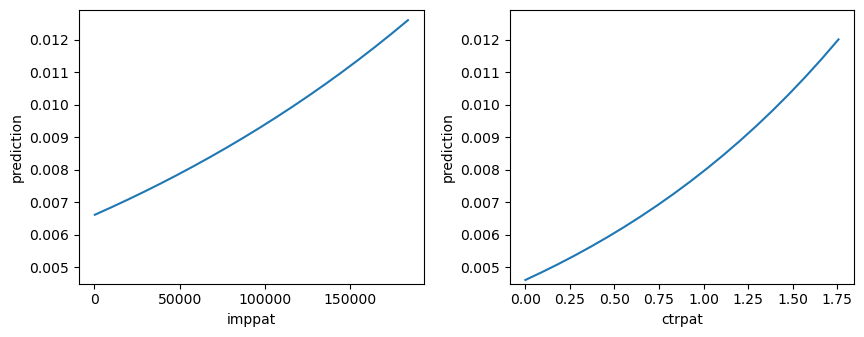

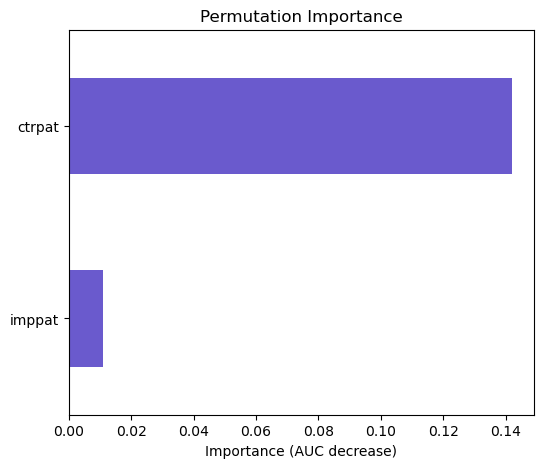

In [16]:
clf_mc2.plot("pred")
clf_mc2.plot("vimp")

The high correlation of 0.97 between "imppat" and "clpat" suggests that the information conveyed by the number of impressions that showed the TZ ad in the app in the hour and the number of clicks the TZ ad received in the app in the hour may have overlaps or be closely related, making it hard to distinguish the effect of one from the other. This can lead to multicollinearity, as suggested by the high VIF in clf_mc1 for these 2 variables (20+), which can increase the standard errors of the coefficients, making them less precise and unstable. A good way to mitigate this unreliability/ possible overfit, would be to remove one of the variables from the model (click, as they are usually dependent on impressions) or to create a new variable that combines both the variables meaningfully, through multiplication or taking a ratio of clicks/impressions (as covered by CTR). In the second model, as noted by the VIF, the removal of "clpat" has definitely reduced the multicollinearity, with the VIF for "imppat" dropping from 20+ to 1.1, indicating that the model is more stable and the coefficients are more reliable. The prediction plot for "imppat" in clf_mc2 shows a positive effect on click probability, albeit a small positive effect as noted by the smaller scale of the y axis, because the coefficient for "imppat" has increased without the presence of "clpat". This suggests that the impact of "imppat" on click probability was not well captured and was distorted by the presence of "clpat" in the model. The removal of "clpat" has allowed the model to better capture the effect of "imppat" on click probability, which is now more accurately reflected in the prediction plot.



c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem 



In [17]:
clf_mc3 = rsm.model.logistic(
    data = {"tz_gaming_train":tz_gaming_train},
    rvar = "click",
    lev = "yes",
    evar = [
        "time_fct",
        "app",
        "imppat", 
        "clpat",
        "ctrpat",
    ],
)
clf_mc3.summary(vif=True)

Logistic regression (GLM)
Data                 : tz_gaming_train
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%        -4.42       0.284  -15.575  < .001  ***
time_fct[2]   0.588   -41.2%        -0.53       0.323   -1.644     0.1     
time_fct[3]   0.693   -30.7%        -0.37       0.461   -0.795   0.426     
time_fct[4]   0.000  -100.0%       -23.83   43904.903   -0.001     1.0     
time_fct[5]   0.000  -100.0%       -23.86   57249.164   -0.000     1.0     
time_fct[6]   0.359   -64.1%        -1.03       1.027   -0.999   0.318     
time_fct[7]   1.220    22.0%         0.20       0.438    0.453    0.65     
time_fct[8]   1.135    13.5%         0.13       0.309    0.411   0.681     
time_fct[9]   1.063     6.3%         0.06     

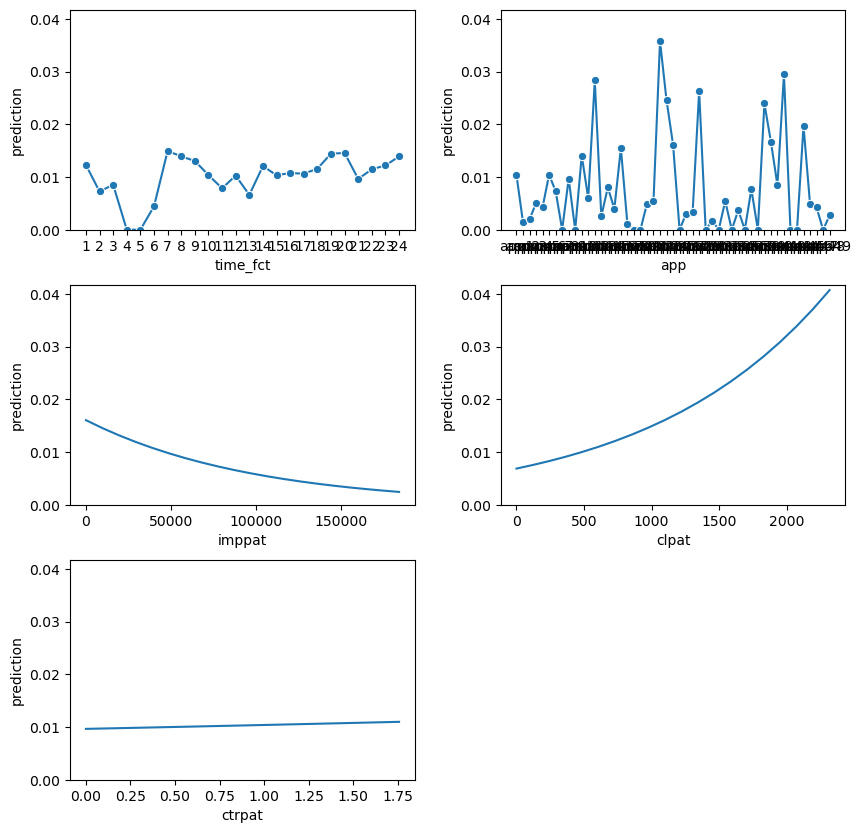

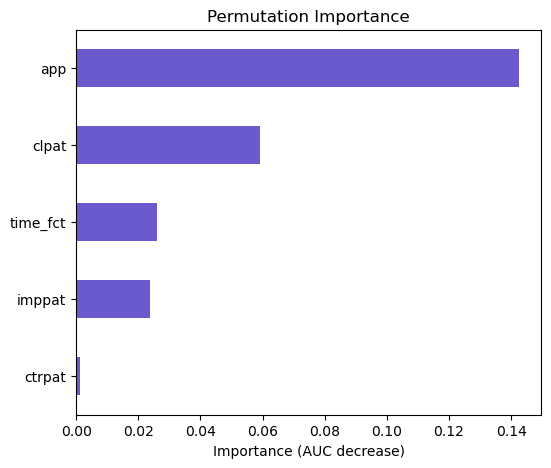

In [18]:
clf_mc3.plot("pred")
clf_mc3.plot("vimp")

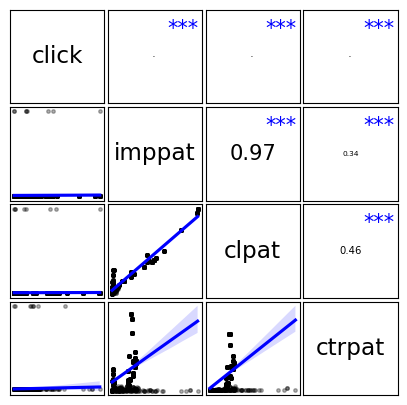

In [19]:
clf_mc3.plot("corr")

It is noticed from the prediction plots that the scale of the y axis for predicting click probability has shrunk (0.00-0.04) compared to the original model (0.02-0.14), signifying that adding time_fct and app reduces the values and variability of the predicted probabilities of click, perhaps because the added variables explain more of the variance, while the multicollinearity of imppat and clpat is still retained at ahigh level (as noted by the increase in VIF for imppat and clpat from 20+ in IIa. to 80+ in IIc.). This decrease in importance of the initial variables, upon the intrduction of the categorical variables is also explained by the coefficient of clpat, ctrpat, and imppat at 0.0 while also being statistically insignificant in the new model (pvalue > 0.05) and odd ratios being very close to . The prediction plots for "clpat" had a stronger positive exponential shape in the first model, but now with the reduced scale is much flatter. "imppat" and "ctrpat" remians almost just as flat, indicating that the categorical variables have diluted the effect that past clicks has on predicting click probability. 

It is also to be noted from the Chisquare, R^s, and AUC, that the newer model has a better performance, indicating that the newer categorical variables added have better predictive power. 

## Part III: Decile Analysis of Logistic Regression Results

> Note: use only the "test" sample of impressions (i.e., 27,953 rows where "training == 'test'")


a. Assign each impression to a decile based on the predicted probability of a click (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles

In [20]:
tz_gaming_test = tz_gaming[tz_gaming["training"] == 'test']


In [21]:
tz_gaming["pred_logit_dec"] = tz_gaming.groupby("training").pred_logit.transform(rsm.xtile, 10, rev = True)


In [22]:
#check
avg_pred_logit_per_dec = tz_gaming.groupby('pred_logit_dec')['pred_logit'].mean()
print(avg_pred_logit_per_dec)

pred_logit_dec
1     0.034292
2     0.017125
3     0.011953
4     0.009000
5     0.006607
6     0.004403
7     0.002678
8     0.001472
9     0.000699
10    0.000093
Name: pred_logit, dtype: float64


b. Report the number of impressions (rows), the number of clicks (`click`), and the click through rate (`ctr`) (i.e., sum of clicks divided by number of impressions) for the TZ ad per decile and save this information to a new dataframe called `dec_tab`

In [23]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)
dec_tab = tz_gaming[tz_gaming.training == "test"].groupby("pred_logit_dec").agg(
    nr_impressions=("pred_logit_dec", "size"),
    nr_clicks=("click", lambda x: (x == "yes").sum()),
).reset_index()

dec_tab["ctr"] = dec_tab["nr_clicks"] / dec_tab["nr_impressions"]
dec_tab

,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,1,2796,103,0.036838
1,2,2793,48,0.017186
2,3,2788,42,0.015065
3,4,2796,30,0.010730
4,5,2802,15,0.005353
5,6,2796,7,0.002504
6,7,2794,7,0.002505
7,8,2796,3,0.001073
8,9,2796,4,0.001431
9,10,2796,12,0.004292


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click-through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click 

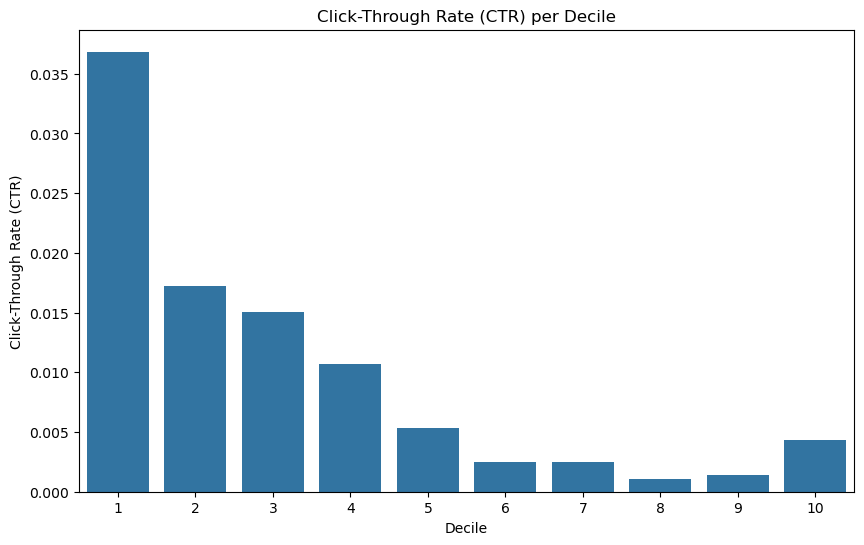

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pred_logit_dec', y='ctr', data=dec_tab)

plt.xlabel('Decile')
plt.ylabel('Click-Through Rate (CTR)')
plt.title('Click-Through Rate (CTR) per Decile')
plt.show()

## Part IV: Gains Curves

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile



In [25]:
# make sure you have columns called 'cum_prop' and 'cum_gains'
total_imp = dec_tab['nr_impressions'].sum()
total_clicks = dec_tab['nr_clicks'].sum()

def calc_gains(df, total1, total2):
    df1 = pd.DataFrame()
    df1['pred_logit_dec'] = df['pred_logit_dec']
    df1['nr_impressions'] = df['nr_impressions']
    df1['cum_prop'] = df['nr_impressions'].cumsum() / total1
    df1['nr_clicks'] = df['nr_clicks']
    df1['gains'] = df['nr_clicks']/total2
    df1['cum_gains'] = df1['gains'].cumsum()
    return df1[['pred_logit_dec','cum_prop', 'cum_gains']]

gains_tab = calc_gains(dec_tab, total_imp, total_clicks) 
gains_tab



,pred_logit_dec,cum_prop,cum_gains
0,1,0.100025,0.380074
1,2,0.199943,0.557196
2,3,0.299682,0.712177
3,4,0.399707,0.822878
4,5,0.499946,0.878229
5,6,0.599971,0.904059
6,7,0.699925,0.929889
7,8,0.799950,0.940959
8,9,0.899975,0.955720
9,10,1.000000,1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis 

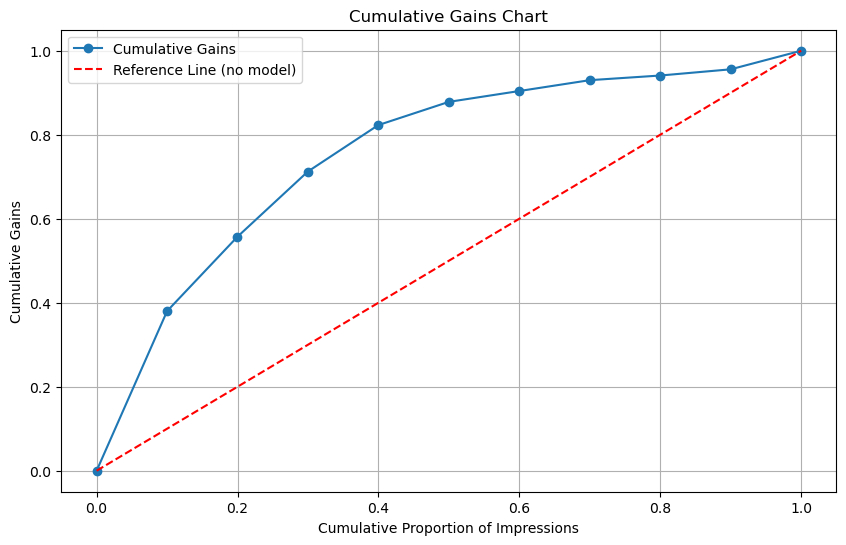

In [26]:
plt.figure(figsize=(10, 6))

# Plot cumulative gains
plt.plot([0] + gains_tab['cum_prop'].tolist(), [0] + gains_tab['cum_gains'].tolist(), label='Cumulative Gains', marker='o')

# Plot reference line with slope 1
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Reference Line (no model)')

plt.xlabel('Cumulative Proportion of Impressions')
plt.ylabel('Cumulative Gains')
plt.title('Cumulative Gains Chart')
plt.legend()
plt.grid(True)
plt.show()

## Part V: Confusion matrix

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created 

In [28]:
#breakeven per impression
cost =  10/ 1000  # cost per impression
margin = 25*0.05 #return for all impressions
breakeven = cost/margin
breakeven

0.008

In [29]:
TP = len(tz_gaming_test[(tz_gaming_test["pred_logit"] > breakeven) & (tz_gaming_test["click"] == "yes")])
FP = len(tz_gaming_test[(tz_gaming_test["pred_logit"] > breakeven) & (tz_gaming_test["click"] == "no")])
TN = len(tz_gaming_test[(tz_gaming_test["pred_logit"] <= breakeven) & (tz_gaming_test["click"] == "no")])
FN = len(tz_gaming_test[(tz_gaming_test["pred_logit"] <= breakeven) & (tz_gaming_test["click"] == "yes")])

cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)
cm_logit

,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


In [30]:
len(tz_gaming_test)

27953

In [31]:
cftotal  = TP + FP + TN + FN
cftotal

27953

In [32]:
accuracy_logit = float((TP + TN) / (TP + FP + TN + FN))
accuracy_logit 

0.6168210925482059

b. Calculate a confusion matrix based on `pred_rnd` created in Part I.e and calculate "accuracy" based on the confusion matrix you created (2 points)

In [33]:
TP_rnd = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] > breakeven) & (tz_gaming_test["click"] == "yes")])
FP_rnd = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] > breakeven) & (tz_gaming_test["click"] == "no")])
TN_rnd = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] <= breakeven) & (tz_gaming_test["click"] == "no")])
FN_rnd = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] <= breakeven) & (tz_gaming_test["click"] == "yes")])


cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_rnd, FP_rnd, TN_rnd, FN_rnd]
    }
)
cm_rnd

,label,nr
0,TP,271
1,FP,27606
2,TN,76
3,FN,0


In [34]:
print(TP_rnd + FP_rnd + TN_rnd + FN_rnd)

27953


In [35]:
accuracy_rnd = float((TP_rnd + TN_rnd) / (TP_rnd + FP_rnd + TN_rnd + FN_rnd))
accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions

In [36]:
# Precision, Recall, and Specificity for the logistic regression model
precision_logit = TP / (TP + FP)
recall_logit = TP / (TP + FN)
specificity_logit = TN / (TN + FP)

# Precision, Recall, and Specificity for the random model
precision_rnd = TP_rnd / (TP_rnd + FP_rnd)
recall_rnd = TP_rnd / (TP_rnd + FN_rnd)
specificity_rnd = TN_rnd / (TN_rnd + FP_rnd)

print(precision_logit, recall_logit, specificity_logit)
print(precision_rnd, recall_rnd, specificity_rnd)

0.02030876677081419 0.8154981549815498 0.6148760927678636
0.00972127560354414 1.0 0.0027454663680369917


Confusion matrix 1 has a higher accuracy (61.68%) than confusion matrix 2 (1.24%) according to the breakeven threshold. Looking at the numbers, we can see that confusion matrix 1 is better at discerning true negatives from false positives, whereas matrix 2 has a larger number of false positives. 

They're both almost similar in performance when detecting True Positives, and have very few False negatives as well. Both have relatively low precision, with the rnd having slightly higher precision than the logit model, indicating that may predict positives incorrectly. Both have high recall with the rnd having the best possible recall, indicating almost no false negatives and good performance in capturing all actual positives, at the risk of having more more false positives. The logit model has much superior specificity at 61% vs the rnd at 0.2%, indicating that the logit model is far better at identifying true negatives.

Overall, matrix 1 seems to be a better fit in terms of accuracy (61% is within a good range for a well-trained model) and recall, and having better specificity than model 2. 

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices discuss  the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions

In [37]:
TP_recalc = len(tz_gaming_test[(tz_gaming_test["pred_logit"] > 0.5) & (tz_gaming_test["click"] == "yes")])
FP_recalc = len(tz_gaming_test[(tz_gaming_test["pred_logit"] > 0.5) & (tz_gaming_test["click"] == "no")])
TN_recalc = len(tz_gaming_test[(tz_gaming_test["pred_logit"] <= 0.5) & (tz_gaming_test["click"] == "no")])
FN_recalc = len(tz_gaming_test[(tz_gaming_test["pred_logit"] <= 0.5) & (tz_gaming_test["click"] == "yes")])

cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_recalc, FP_recalc, TN_recalc, FN_recalc]
    }
)
cm_logit_recalc


,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [38]:
accuracy_logit_recalc = float((TP_recalc + TN_recalc) / (TP_recalc + FP_recalc + TN_recalc + FN_recalc))
accuracy_logit_recalc

0.9903051550817443

In [39]:
TP_rnd_recalc = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] > 0.5) & (tz_gaming_test["click"] == "yes")])
FP_rnd_recalc = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] > 0.5) & (tz_gaming_test["click"] == "no")])
TN_rnd_recalc = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] <= 0.5) & (tz_gaming_test["click"] == "no")])
FN_rnd_recalc = len(tz_gaming_test[(tz_gaming_test["pred_rnd"] <= 0.5) & (tz_gaming_test["click"] == "yes")])

cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_rnd_recalc, FP_rnd_recalc, TN_rnd_recalc, FN_rnd_recalc]
    }
)
cm_rnd_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [40]:
accuracy_rnd_recalc = float((TP_rnd_recalc + TN_rnd_recalc) / (TP_rnd_recalc + FP_rnd_recalc + TN_rnd_recalc + FN_rnd_recalc))
accuracy_rnd_recalc

0.9903051550817443

In [41]:
pred_logit_range = (tz_gaming_test["pred_logit"].min(), tz_gaming_test["pred_logit"].max())
pred_rnd_range = (tz_gaming_test["pred_rnd"].min(), tz_gaming_test["pred_rnd"].max())

print("Range of pred_logit:", pred_logit_range)
print("Range of pred_rnd:", pred_rnd_range)

Range of pred_logit: (3.092070206096217e-31, 0.3681366864105784)
Range of pred_rnd: (0.0077465361832626, 0.010414948142209474)


Th two matrices have identical performances with a threshold of 0.5, this is because none of the pred_logit or pred_rnd value exceed the threshold. Based on this threshold both models are equally bad at predicting, with no true positives detected. The high accuracy is indicative of the data leakage relative to the 0.5 threshold, that neither model is able to meet.

## Part VI: Model comparison


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming 20-million impression advertising campaign:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.



a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise 

In [42]:
tz_gaming["target_logit"] = tz_gaming["pred_logit"] > breakeven
tz_gaming

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,target_logit
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10,False
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3,True
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7,False
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3,True
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,8,False
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,6,False
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,2,True
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,1,True


b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise 

In [43]:
tz_gaming["target_rnd"] = tz_gaming["pred_rnd"] > breakeven
tz_gaming

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,target_logit,target_rnd
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10,False,True
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3,True,True
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7,False,True
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3,True,True
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,8,False,True
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,6,False,True
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,2,True,True
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,1,True,True


c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise

In [44]:
# insert your answer here
tz_gaming["target_vneta"] = tz_gaming["pred_vneta"] > breakeven
tz_gaming

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,target_logit,target_rnd,target_vneta
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10,False,True,False
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3,True,True,False
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7,False,True,False
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3,True,True,True
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,8,False,True,False
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,6,False,True,False
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,2,True,True,False
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,1,True,True,True


d. Based on the performance in the test set (i.e, `training == 'test'`), calculate the **projected** expected profit (in dollars) and the expected return on marketing expenditures (ROME) for the upcoming campaign if TZ (1) "spams" everyone, (2) continues to target using their current approach (i.e., use `pred_rnd`), (3) uses the data from Vneta to build the logistic regression from section I (i.e., use `pred_logit`) for targeting, or (4) used Vneta's data science consulting services (i.e., use `pred_vneta`) to **select the best prospects out of 20M impressions**.

> Note: Calculate the total **projected profits from selecting the best prospects out of 20M impressions** under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

In [45]:
tz_gaming_test2 = tz_gaming[tz_gaming["training"] == 'test']
tz_gaming_test2

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,target_logit,target_rnd,target_vneta
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791,4,True,True,False
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718,4,True,True,True
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448,10,False,True,False
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630,5,False,True,False
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086,3,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,8,False,True,False
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,6,False,True,False
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,2,True,True,False
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,1,True,True,True


In [46]:
print(len(tz_gaming_test2), len(tz_gaming_test))

27953 27953


In [47]:
tz_gaming_test2 = tz_gaming_test2.copy()
tz_gaming_test2.loc[:, "clicktrue"] = tz_gaming_test2["click"].apply(lambda x: 1 if x == "yes" else 0)
tz_gaming_test2["clicktrue"] = tz_gaming_test2["clicktrue"].astype(int)



In [48]:
#spam
nr_impressions = 20000000
impression_cost = (10/1000) * nr_impressions
clickrate = tz_gaming_test2["clicktrue"].mean()
nr_clicks = clickrate * nr_impressions
revenue = 25 * nr_clicks * 0.05
profit = revenue - impression_cost
ROME = profit / impression_cost

#logit
tz_gaming_test2_logit_breakeven = tz_gaming_test2[tz_gaming_test2["pred_logit"] > breakeven]
nr_impressions_logit = (len(tz_gaming_test2[tz_gaming_test2["target_logit"] == True])/len(tz_gaming_test2)) * 20000000
impression_cost_logit = (10/1000) * nr_impressions_logit
clickrate_logit = tz_gaming_test2_logit_breakeven["pred_logit"].mean()
nr_clicks_logit = clickrate_logit * nr_impressions_logit
revenue_logit = 25 * nr_clicks_logit * 0.05
profit_logit = revenue_logit - impression_cost_logit
ROME_logit = profit_logit / impression_cost_logit

#rnd
tz_gaming_test2_logit_rnd = tz_gaming_test2[tz_gaming_test2["pred_rnd"] > breakeven]
nr_impressions_rnd = (len(tz_gaming_test2[tz_gaming_test2["target_rnd"] == True])/len(tz_gaming_test2)) * 20000000
impression_cost_rnd = (10/1000) * nr_impressions_rnd
clickrate_rnd = tz_gaming_test2_logit_rnd["pred_rnd"].mean()
nr_clicks_rnd = clickrate_rnd * nr_impressions_rnd
revenue_rnd = 25 * nr_clicks_rnd * 0.05
profit_rnd = revenue_rnd - impression_cost_rnd
ROME_rnd = profit_rnd / impression_cost_rnd

#vneta
tz_gaming_test2_logit_vneta = tz_gaming_test2[tz_gaming_test2["pred_vneta"] > breakeven]
nr_impressions_vneta = (len(tz_gaming_test2[tz_gaming_test2["target_vneta"] == True])/len(tz_gaming_test2)) * 20000000
impression_cost_vneta = (10/1000) * nr_impressions_vneta
clickrate_vneta = tz_gaming_test2_logit_vneta["pred_vneta"].mean()
nr_clicks_vneta = clickrate_vneta * nr_impressions_vneta
revenue_vneta = 25 * nr_clicks_vneta * 0.05
profit_vneta = revenue_vneta - impression_cost_vneta
ROME_vneta = profit_vneta / impression_cost_vneta

In [49]:
Comparisondfd = pd.DataFrame(
    {
        "Model": ["Spam", "Logit", "Random", "Vneta"],
        "Impressions": [nr_impressions, nr_impressions_logit, nr_impressions_rnd, nr_impressions_vneta],
        "Impression Cost": [impression_cost, impression_cost_logit, impression_cost_rnd, impression_cost_vneta],
        "Click Rate": [clickrate, clickrate_logit, clickrate_rnd, clickrate_vneta],
        "Clicks": [nr_clicks, nr_clicks_logit, nr_clicks_rnd, nr_clicks_vneta],
        "Revenue": [revenue, revenue_logit, revenue_rnd, revenue_vneta],
        "Profit": [profit, profit_logit, profit_rnd, profit_vneta],
        "ROME": [ROME, ROME_logit, ROME_rnd, ROME_vneta]
    }
)
Comparisondfd

,Model,Impressions,Impression Cost,Click Rate,Clicks,Revenue,Profit,ROME
0,Spam,2.000000e+07,200000.000000,0.009695,193896.898365,242371.122956,42371.122956,0.211856
1,Logit,7.785926e+06,77859.263764,0.018372,143045.811619,178807.264523,100948.000759,1.296545
2,Random,1.994562e+07,199456.230101,0.008843,176372.584863,220465.731078,21009.500978,0.105334
3,Vneta,3.485136e+06,34851.357636,0.032371,112815.925504,141019.906880,106168.549244,3.046325


In [50]:
# calculate and add profit and ROME values for each approach
# to the mod_perf data frame
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit],
        "ROME": [ROME_logit, ROME_rnd, ROME_vneta, ROME],
    }
)
mod_perf

,model,profit,ROME
0,logit,100948.000759,1.296545
1,rnd,21009.500978,0.105334
2,vneta,106168.549244,3.046325
3,spam,42371.122956,0.211856


In [51]:
logit_actual_profit = profit_logit - 50000
vneta_actual_profit = profit_vneta - 150000

print(logit_actual_profit, vneta_actual_profit)

actual_profits = [logit_actual_profit, profit_rnd, vneta_actual_profit, profit]
sorted_actual_profits = sorted(actual_profits, reverse=True)
print(sorted_actual_profits)

50948.000759038856 -43831.450756062215
[50948.000759038856, 42371.122956391104, 21009.50097769173, -43831.450756062215]


Based on the projected profit numbers, the Vneta approach is the most profitable ($106,168.55) and has the greatest ROME (3.05%). The second most lucrative approach is the logit method, followed by the spam method, and finally the rnd. However, based on the costs associated with the services, when choosing the best of 20M impressions, the logit method i.e. using the data from Vneta to build the logistic regression, is the recommended approach. 

As seen from the numbers, subtracting the costs of $50k and $150k from the profits from the logit approach and vneta approach respectively, the profits reduce to $50,948.00 and -$43,831.450 approx. The Vneta approach is therefore not worth expense as it results in a loss, at this volume of impressions. 



e. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases exactly 20-million impressions for the upcoming ad campaign out of the +500M prospects that Vneta has access to 

> Note: Calculate **projected profits from purchasing exactly 20M impressions** under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

In [52]:
def perf_calc20M(clickrate):
    nr_impressions = 20000000
    impression_cost = (10/1000) * nr_impressions
    nr_clicks = clickrate * nr_impressions
    revenue = 25 * nr_clicks * 0.05
    profit = revenue - impression_cost
    ROME = profit / impression_cost
    return profit, ROME

#spam
clickrate20 = tz_gaming_test2["clicktrue"].mean()
profit20 = perf_calc20M(clickrate20)[0]
ROME_20 = perf_calc20M(clickrate20)[1]

#logit
clickrate_logit20 = tz_gaming_test2_logit_breakeven["pred_logit"].mean()
profit_logit20 = perf_calc20M(clickrate_logit20)[0]
ROME_logit20 = perf_calc20M(clickrate_logit20)[1]

#rnd
clickrate_rnd20 = tz_gaming_test2_logit_rnd["pred_rnd"].mean()
profit_rnd20 = perf_calc20M(clickrate_rnd20)[0]
ROME_rnd20 = perf_calc20M(clickrate_rnd20)[1]

#vneta
clickrate_vneta20 = tz_gaming_test2_logit_vneta["pred_vneta"].mean()
profit_vneta20 = perf_calc20M(clickrate_vneta20)[0]
ROME_vneta20 = perf_calc20M(clickrate_vneta20)[1]



In [53]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit20, profit_rnd20, profit_vneta20, profit20],
        "ROME": [ROME_logit20, ROME_rnd20, ROME_vneta20, ROME_20],
    }
)
mod_perf_20M

,model,profit,ROME
0,logit,259308.901417,1.296545
1,rnd,21066.778377,0.105334
2,vneta,609264.926507,3.046325
3,spam,42371.122956,0.211856


In [54]:
logit20_actual_profit = profit_logit20 - 50000
vneta20_actual_profit = profit_vneta20 - 150000

print(logit20_actual_profit, vneta20_actual_profit)

actual_profits20 = [logit20_actual_profit, profit_rnd20, vneta20_actual_profit, profit20]
sorted_actual_profits20 = sorted(actual_profits20, reverse=True)
print(sorted_actual_profits20)

209308.90141678113 459264.9265070403
[459264.9265070403, 209308.90141678113, 42371.122956391104, 21066.7783774946]


Based on the projected profit numbers, the Vneta approach is the most profitable ($609,264.93) and has the greatest ROME (3.05%). The second most lucrative approach is the logit method, followed by the spam method, and finally the rnd. Even after including the costs associated with the services, when choosing the best 20M impressions out of 500M+ impressions, the vneta method i.e. using the Vneta’s data science consulting services, is the recommended approach. 

As seen from the numbers, subtracting the costs of $50k and $150k from the profits from the logit approach and vneta approach respectively, the profits reduce to only $209,308.90 and $459,264.93 approx. The Vneta approach is therefore worth paying for as it results in more than double the profit as compared to the next best method, which is the logi, which are both far more lucrative than the spam method or the internal rnd method, which is faring worse than spamming. 